<a href="https://colab.research.google.com/github/GiorgioMB/UniversityProjects/blob/main/Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.8 MB/s eta 0:00:00


In [2]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [5]:
import tensorflow as tf
import os
import optuna
import multiprocessing as mp
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from kaggle.api.kaggle_api_extended import KaggleApi
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Rescaling
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from hyperopt import fmin, tpe, hp
from sklearn.metrics import confusion_matrix,f1_score, recall_score, precision_score, accuracy_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom


In [6]:
##Run only once
os.environ['KAGGLE_CONFIG_DIR'] = '/kaggle.json'
dataset_name = 'puneet6060/intel-image-classification'
api = KaggleApi()
api.authenticate()
print("Authenticated, downloading dataset...")
api.dataset_download_files(dataset_name, path='/Users/micalettog/Desktop/Computer Science/Projects/BSDSA/ImageCNN/dataset/', unzip=True)
print("Dataset downloaded")
##

Authenticated, downloading dataset...
Dataset downloaded


In [7]:
batch_size = 32
img_height = 150
img_width = 150
num_classes = 6

dataset_test_dir = r"/Users/micalettog/Desktop/Computer Science/Projects/BSDSA/ImageCNN/dataset/seg_test/seg_test"
dataset_train_dir = r"/Users/micalettog/Desktop/Computer Science/Projects/BSDSA/ImageCNN/dataset/seg_train/seg_train"

train_ds = image_dataset_from_directory(
    dataset_train_dir,
    seed=341,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    dataset_test_dir,
    seed=341,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_true_labels = []  # List to store true labels

for images, labels in val_ds:
    val_true_labels.extend(labels.numpy())

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [ ]:
from optuna.pruners import MedianPruner

study = optuna.create_study(study_name='distributed_study', direction='minimize', pruner=MedianPruner())

def objective(trial):
    kernel_size = trial.suggest_categorical('kernel_size', [4, 5, 6])
    num_filters = 48
    learning_rate = 0.000627151974189123
    dropout = trial.suggest_float('dropout', 0.03, 0.1)
    dropout2 = trial.suggest_float('dropout2', 0.03, 0.1)
    dropout3 = trial.suggest_float('dropout3', 0.03, 0.1)
    dropout4 = trial.suggest_float('dropout4', 0.03, 0.1)

    model = Sequential([
        data_augmentation,
        Rescaling(1./255),
        Conv2D(num_filters, kernel_size, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(num_filters, kernel_size, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(num_filters, kernel_size, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(num_filters, kernel_size, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        layers.GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(dropout),
        Dense(128, activation='relu'),
        Dropout(dropout2),
        Dense(64, activation='relu'),
        Dropout(dropout3),
        Dense(32, activation='relu'),
        Dropout(dropout4),
        Dense(16, activation='relu'),
        Dense(6, activation = 'softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
    try:
        model.fit(
            train_ds,
            epochs=20,
            validation_data=val_ds,
            verbose=2
        )
        val_loss, val_accuracy = model.evaluate(val_ds, verbose=2)
        return val_loss
    except Exception as e:
        return np.inf

study.optimize(objective, 10)

best_params = study.best_trial.params
print(best_params)

[I 2023-11-30 22:18:04,112] A new study created in memory with name: distributed_study


Epoch 1/20
439/439 - 16s - loss: 1.3963 - accuracy: 0.3913 - val_loss: 1.1427 - val_accuracy: 0.4977 - 16s/epoch - 35ms/step
Epoch 2/20
439/439 - 9s - loss: 1.1598 - accuracy: 0.4993 - val_loss: 1.0147 - val_accuracy: 0.5677 - 9s/epoch - 22ms/step
Epoch 3/20
439/439 - 12s - loss: 1.0295 - accuracy: 0.5857 - val_loss: 1.0211 - val_accuracy: 0.5893 - 12s/epoch - 28ms/step
Epoch 4/20
439/439 - 11s - loss: 0.9389 - accuracy: 0.6408 - val_loss: 0.8259 - val_accuracy: 0.6927 - 11s/epoch - 25ms/step
Epoch 5/20
439/439 - 11s - loss: 0.8679 - accuracy: 0.6802 - val_loss: 0.8447 - val_accuracy: 0.6940 - 11s/epoch - 25ms/step
Epoch 6/20
439/439 - 11s - loss: 0.7955 - accuracy: 0.7091 - val_loss: 0.6909 - val_accuracy: 0.7487 - 11s/epoch - 26ms/step
Epoch 7/20
439/439 - 10s - loss: 0.7638 - accuracy: 0.7242 - val_loss: 0.6994 - val_accuracy: 0.7460 - 10s/epoch - 22ms/step
Epoch 8/20
439/439 - 11s - loss: 0.7196 - accuracy: 0.7410 - val_loss: 0.6668 - val_accuracy: 0.7600 - 11s/epoch - 24ms/step
Ep

[I 2023-11-30 22:22:20,676] Trial 0 finished with value: 0.4848508834838867 and parameters: {'kernel_size': 4, 'dropout': 0.09376388346898239, 'dropout2': 0.06532546152632077, 'dropout3': 0.042229259926833865, 'dropout4': 0.04783538323463389}. Best is trial 0 with value: 0.4848508834838867.


Epoch 1/20
439/439 - 16s - loss: 1.3844 - accuracy: 0.3778 - val_loss: 1.3311 - val_accuracy: 0.3973 - 16s/epoch - 37ms/step
Epoch 2/20
439/439 - 10s - loss: 1.1676 - accuracy: 0.4974 - val_loss: 1.0762 - val_accuracy: 0.5207 - 10s/epoch - 24ms/step
Epoch 3/20
439/439 - 12s - loss: 1.0794 - accuracy: 0.5440 - val_loss: 1.0216 - val_accuracy: 0.5633 - 12s/epoch - 28ms/step
Epoch 4/20
439/439 - 11s - loss: 1.0105 - accuracy: 0.5907 - val_loss: 0.9566 - val_accuracy: 0.6340 - 11s/epoch - 26ms/step
Epoch 5/20
439/439 - 11s - loss: 0.9170 - accuracy: 0.6504 - val_loss: 0.8061 - val_accuracy: 0.6973 - 11s/epoch - 25ms/step
Epoch 6/20
439/439 - 11s - loss: 0.8558 - accuracy: 0.6814 - val_loss: 0.7645 - val_accuracy: 0.7200 - 11s/epoch - 26ms/step
Epoch 7/20
439/439 - 11s - loss: 0.7983 - accuracy: 0.7088 - val_loss: 0.7677 - val_accuracy: 0.7333 - 11s/epoch - 25ms/step
Epoch 8/20
439/439 - 11s - loss: 0.7562 - accuracy: 0.7256 - val_loss: 0.7484 - val_accuracy: 0.7367 - 11s/epoch - 25ms/step


[I 2023-11-30 22:26:58,854] Trial 1 finished with value: 0.5115832686424255 and parameters: {'kernel_size': 5, 'dropout': 0.08743838559602984, 'dropout2': 0.03354150836375619, 'dropout3': 0.03764030356004623, 'dropout4': 0.03503876836917904}. Best is trial 0 with value: 0.4848508834838867.


Epoch 1/20
439/439 - 16s - loss: 1.4032 - accuracy: 0.4047 - val_loss: 1.3443 - val_accuracy: 0.4627 - 16s/epoch - 37ms/step
Epoch 2/20
439/439 - 13s - loss: 1.1592 - accuracy: 0.5251 - val_loss: 1.0118 - val_accuracy: 0.5850 - 13s/epoch - 31ms/step
Epoch 3/20
439/439 - 11s - loss: 1.0622 - accuracy: 0.5757 - val_loss: 0.9954 - val_accuracy: 0.6077 - 11s/epoch - 25ms/step
Epoch 4/20
439/439 - 12s - loss: 0.9855 - accuracy: 0.6217 - val_loss: 0.9106 - val_accuracy: 0.6577 - 12s/epoch - 27ms/step
Epoch 5/20
439/439 - 12s - loss: 0.9151 - accuracy: 0.6568 - val_loss: 0.8105 - val_accuracy: 0.6903 - 12s/epoch - 27ms/step
Epoch 6/20
439/439 - 13s - loss: 0.8673 - accuracy: 0.6821 - val_loss: 0.8195 - val_accuracy: 0.7053 - 13s/epoch - 31ms/step
Epoch 7/20
439/439 - 10s - loss: 0.8102 - accuracy: 0.7027 - val_loss: 0.7672 - val_accuracy: 0.7290 - 10s/epoch - 24ms/step
Epoch 8/20
439/439 - 13s - loss: 0.7899 - accuracy: 0.7133 - val_loss: 0.7282 - val_accuracy: 0.7483 - 13s/epoch - 29ms/step


[I 2023-11-30 22:31:35,197] Trial 2 finished with value: 0.574216365814209 and parameters: {'kernel_size': 6, 'dropout': 0.05842176334371751, 'dropout2': 0.07623205343507748, 'dropout3': 0.07008670783577886, 'dropout4': 0.0497328736187352}. Best is trial 0 with value: 0.4848508834838867.


Epoch 1/20
439/439 - 14s - loss: 1.3694 - accuracy: 0.4000 - val_loss: 1.1723 - val_accuracy: 0.4757 - 14s/epoch - 33ms/step
Epoch 2/20
439/439 - 12s - loss: 1.1402 - accuracy: 0.5207 - val_loss: 0.9366 - val_accuracy: 0.6033 - 12s/epoch - 28ms/step
Epoch 3/20
439/439 - 12s - loss: 1.0211 - accuracy: 0.5955 - val_loss: 0.9393 - val_accuracy: 0.6380 - 12s/epoch - 27ms/step
Epoch 4/20
439/439 - 11s - loss: 0.9506 - accuracy: 0.6373 - val_loss: 0.8176 - val_accuracy: 0.6900 - 11s/epoch - 24ms/step
Epoch 5/20
439/439 - 12s - loss: 0.8600 - accuracy: 0.6848 - val_loss: 0.7233 - val_accuracy: 0.7310 - 12s/epoch - 28ms/step
Epoch 6/20
439/439 - 12s - loss: 0.8020 - accuracy: 0.7108 - val_loss: 0.7047 - val_accuracy: 0.7463 - 12s/epoch - 28ms/step
Epoch 7/20
439/439 - 11s - loss: 0.7345 - accuracy: 0.7383 - val_loss: 0.8307 - val_accuracy: 0.6990 - 11s/epoch - 25ms/step
Epoch 8/20
439/439 - 10s - loss: 0.6919 - accuracy: 0.7517 - val_loss: 0.6847 - val_accuracy: 0.7530 - 10s/epoch - 22ms/step


[I 2023-11-30 22:36:01,464] Trial 3 finished with value: 0.5201398134231567 and parameters: {'kernel_size': 4, 'dropout': 0.041634119149900436, 'dropout2': 0.05103744964239701, 'dropout3': 0.048213926554436376, 'dropout4': 0.05906977330309911}. Best is trial 0 with value: 0.4848508834838867.


Epoch 1/20
439/439 - 14s - loss: 1.4769 - accuracy: 0.3558 - val_loss: 1.2090 - val_accuracy: 0.4850 - 14s/epoch - 32ms/step
Epoch 2/20
439/439 - 9s - loss: 1.0863 - accuracy: 0.5614 - val_loss: 0.9775 - val_accuracy: 0.6323 - 9s/epoch - 21ms/step
Epoch 3/20
439/439 - 11s - loss: 0.9630 - accuracy: 0.6351 - val_loss: 1.0183 - val_accuracy: 0.6230 - 11s/epoch - 25ms/step
Epoch 4/20
439/439 - 11s - loss: 0.8703 - accuracy: 0.6761 - val_loss: 0.8717 - val_accuracy: 0.6787 - 11s/epoch - 26ms/step
Epoch 5/20
439/439 - 11s - loss: 0.8345 - accuracy: 0.6907 - val_loss: 0.7490 - val_accuracy: 0.7157 - 11s/epoch - 25ms/step
Epoch 6/20
439/439 - 10s - loss: 0.7709 - accuracy: 0.7230 - val_loss: 0.8248 - val_accuracy: 0.7050 - 10s/epoch - 23ms/step
Epoch 7/20
439/439 - 10s - loss: 0.7411 - accuracy: 0.7336 - val_loss: 0.6328 - val_accuracy: 0.7707 - 10s/epoch - 23ms/step
Epoch 8/20
439/439 - 12s - loss: 0.7028 - accuracy: 0.7479 - val_loss: 0.6269 - val_accuracy: 0.7680 - 12s/epoch - 28ms/step
Ep

[I 2023-11-30 22:40:20,571] Trial 4 finished with value: 0.506549060344696 and parameters: {'kernel_size': 4, 'dropout': 0.06934293148829877, 'dropout2': 0.08027964992204611, 'dropout3': 0.047320168584716854, 'dropout4': 0.05410603450825664}. Best is trial 0 with value: 0.4848508834838867.


Epoch 1/20
439/439 - 14s - loss: 1.3771 - accuracy: 0.3945 - val_loss: 1.4515 - val_accuracy: 0.4247 - 14s/epoch - 32ms/step
Epoch 2/20
439/439 - 11s - loss: 1.1300 - accuracy: 0.5353 - val_loss: 1.1430 - val_accuracy: 0.5697 - 11s/epoch - 25ms/step
Epoch 3/20
439/439 - 11s - loss: 1.0053 - accuracy: 0.6107 - val_loss: 0.8774 - val_accuracy: 0.6650 - 11s/epoch - 26ms/step
Epoch 4/20
439/439 - 12s - loss: 0.9215 - accuracy: 0.6611 - val_loss: 0.7713 - val_accuracy: 0.7163 - 12s/epoch - 26ms/step
Epoch 5/20
439/439 - 12s - loss: 0.8467 - accuracy: 0.6930 - val_loss: 0.7113 - val_accuracy: 0.7407 - 12s/epoch - 28ms/step
Epoch 6/20
439/439 - 11s - loss: 0.7801 - accuracy: 0.7214 - val_loss: 0.6773 - val_accuracy: 0.7553 - 11s/epoch - 24ms/step
Epoch 7/20
439/439 - 12s - loss: 0.7322 - accuracy: 0.7374 - val_loss: 0.6403 - val_accuracy: 0.7820 - 12s/epoch - 28ms/step
Epoch 8/20
439/439 - 12s - loss: 0.6912 - accuracy: 0.7539 - val_loss: 0.5949 - val_accuracy: 0.7933 - 12s/epoch - 26ms/step


[I 2023-11-30 22:45:18,429] Trial 5 finished with value: 0.4835354685783386 and parameters: {'kernel_size': 4, 'dropout': 0.06926692273600446, 'dropout2': 0.07112997036707623, 'dropout3': 0.0780814307539649, 'dropout4': 0.030436704275823536}. Best is trial 5 with value: 0.4835354685783386.


Epoch 1/20
439/439 - 14s - loss: 1.4322 - accuracy: 0.3682 - val_loss: 1.2440 - val_accuracy: 0.4667 - 14s/epoch - 32ms/step
Epoch 2/20
439/439 - 11s - loss: 1.1252 - accuracy: 0.5385 - val_loss: 0.9928 - val_accuracy: 0.5997 - 11s/epoch - 25ms/step
Epoch 3/20
439/439 - 11s - loss: 1.0015 - accuracy: 0.6141 - val_loss: 0.8889 - val_accuracy: 0.6613 - 11s/epoch - 25ms/step
Epoch 4/20
439/439 - 11s - loss: 0.9082 - accuracy: 0.6596 - val_loss: 0.8106 - val_accuracy: 0.7120 - 11s/epoch - 26ms/step
Epoch 5/20
439/439 - 11s - loss: 0.8365 - accuracy: 0.6947 - val_loss: 0.7307 - val_accuracy: 0.7297 - 11s/epoch - 25ms/step
Epoch 6/20
439/439 - 11s - loss: 0.7865 - accuracy: 0.7196 - val_loss: 0.7470 - val_accuracy: 0.7363 - 11s/epoch - 26ms/step
Epoch 7/20
439/439 - 10s - loss: 0.7472 - accuracy: 0.7304 - val_loss: 0.6380 - val_accuracy: 0.7797 - 10s/epoch - 23ms/step
Epoch 8/20
439/439 - 11s - loss: 0.6981 - accuracy: 0.7476 - val_loss: 0.6784 - val_accuracy: 0.7660 - 11s/epoch - 25ms/step


[I 2023-11-30 22:49:44,636] Trial 6 finished with value: 0.5574865937232971 and parameters: {'kernel_size': 5, 'dropout': 0.03692635175032521, 'dropout2': 0.07535309474889335, 'dropout3': 0.035022616215172456, 'dropout4': 0.0687275910093443}. Best is trial 5 with value: 0.4835354685783386.


Epoch 1/20
439/439 - 14s - loss: 1.4275 - accuracy: 0.3874 - val_loss: 1.2141 - val_accuracy: 0.4903 - 14s/epoch - 33ms/step
Epoch 2/20
439/439 - 12s - loss: 1.1487 - accuracy: 0.5215 - val_loss: 1.2336 - val_accuracy: 0.5210 - 12s/epoch - 27ms/step
Epoch 3/20
439/439 - 11s - loss: 1.0470 - accuracy: 0.5854 - val_loss: 1.0587 - val_accuracy: 0.5813 - 11s/epoch - 25ms/step
Epoch 4/20
439/439 - 11s - loss: 0.9639 - accuracy: 0.6258 - val_loss: 0.8616 - val_accuracy: 0.6723 - 11s/epoch - 25ms/step
Epoch 5/20
439/439 - 10s - loss: 0.8828 - accuracy: 0.6734 - val_loss: 0.7581 - val_accuracy: 0.7193 - 10s/epoch - 22ms/step
Epoch 6/20
439/439 - 11s - loss: 0.8346 - accuracy: 0.6965 - val_loss: 0.9309 - val_accuracy: 0.6800 - 11s/epoch - 24ms/step
Epoch 7/20
439/439 - 11s - loss: 0.7784 - accuracy: 0.7229 - val_loss: 0.7169 - val_accuracy: 0.7497 - 11s/epoch - 25ms/step
Epoch 8/20
439/439 - 12s - loss: 0.7472 - accuracy: 0.7372 - val_loss: 0.7454 - val_accuracy: 0.7553 - 12s/epoch - 28ms/step


[I 2023-11-30 22:53:36,299] Trial 7 finished with value: 0.5567973852157593 and parameters: {'kernel_size': 5, 'dropout': 0.05851279139421392, 'dropout2': 0.04760298927278862, 'dropout3': 0.03482235941104827, 'dropout4': 0.05593534110547675}. Best is trial 5 with value: 0.4835354685783386.


Epoch 1/20
439/439 - 14s - loss: 1.3790 - accuracy: 0.3905 - val_loss: 1.5986 - val_accuracy: 0.3527 - 14s/epoch - 31ms/step
Epoch 2/20
439/439 - 11s - loss: 1.1604 - accuracy: 0.4855 - val_loss: 1.0343 - val_accuracy: 0.5567 - 11s/epoch - 24ms/step
Epoch 3/20
439/439 - 11s - loss: 1.0548 - accuracy: 0.5693 - val_loss: 0.9731 - val_accuracy: 0.6070 - 11s/epoch - 25ms/step
Epoch 4/20
439/439 - 11s - loss: 0.9650 - accuracy: 0.6164 - val_loss: 0.8734 - val_accuracy: 0.6647 - 11s/epoch - 24ms/step
Epoch 5/20
439/439 - 10s - loss: 0.8999 - accuracy: 0.6652 - val_loss: 0.8558 - val_accuracy: 0.6687 - 10s/epoch - 22ms/step
Epoch 6/20
439/439 - 11s - loss: 0.8266 - accuracy: 0.6970 - val_loss: 0.6953 - val_accuracy: 0.7507 - 11s/epoch - 26ms/step
Epoch 7/20
439/439 - 11s - loss: 0.7497 - accuracy: 0.7346 - val_loss: 0.7807 - val_accuracy: 0.7037 - 11s/epoch - 25ms/step
Epoch 8/20
439/439 - 12s - loss: 0.7112 - accuracy: 0.7493 - val_loss: 0.6527 - val_accuracy: 0.7697 - 12s/epoch - 27ms/step


[I 2023-11-30 22:57:47,937] Trial 8 finished with value: 0.6094934344291687 and parameters: {'kernel_size': 4, 'dropout': 0.09001063524764508, 'dropout2': 0.09182622102526194, 'dropout3': 0.060266319368889244, 'dropout4': 0.08256281911013202}. Best is trial 5 with value: 0.4835354685783386.


Epoch 1/20
439/439 - 15s - loss: 1.6068 - accuracy: 0.2819 - val_loss: 1.2323 - val_accuracy: 0.4397 - 15s/epoch - 33ms/step
Epoch 2/20
439/439 - 11s - loss: 1.2033 - accuracy: 0.4911 - val_loss: 1.1123 - val_accuracy: 0.5800 - 11s/epoch - 26ms/step
Epoch 3/20
439/439 - 11s - loss: 1.0199 - accuracy: 0.6072 - val_loss: 0.8859 - val_accuracy: 0.6757 - 11s/epoch - 26ms/step
Epoch 4/20
439/439 - 11s - loss: 0.9048 - accuracy: 0.6628 - val_loss: 0.7708 - val_accuracy: 0.7160 - 11s/epoch - 25ms/step
Epoch 5/20
439/439 - 13s - loss: 0.8519 - accuracy: 0.6896 - val_loss: 0.7160 - val_accuracy: 0.7450 - 13s/epoch - 29ms/step
Epoch 6/20
439/439 - 12s - loss: 0.7932 - accuracy: 0.7108 - val_loss: 0.6808 - val_accuracy: 0.7567 - 12s/epoch - 26ms/step
Epoch 7/20
439/439 - 12s - loss: 0.7474 - accuracy: 0.7346 - val_loss: 0.7614 - val_accuracy: 0.7167 - 12s/epoch - 26ms/step
Epoch 8/20
439/439 - 11s - loss: 0.7364 - accuracy: 0.7392 - val_loss: 0.6879 - val_accuracy: 0.7443 - 11s/epoch - 26ms/step


[I 2023-11-30 23:02:38,432] Trial 9 finished with value: 0.5334668159484863 and parameters: {'kernel_size': 6, 'dropout': 0.03697329135869298, 'dropout2': 0.05644187519783355, 'dropout3': 0.055036886866220464, 'dropout4': 0.0967404609924713}. Best is trial 5 with value: 0.4835354685783386.


{'kernel_size': 4, 'dropout': 0.06926692273600446, 'dropout2': 0.07112997036707623, 'dropout3': 0.0780814307539649, 'dropout4': 0.030436704275823536}


In [8]:
params = {'num_filters': 48, 'kernel_size': 4, 'learning_rate': 0.0007327937745194752, 'dropout': 0.06926692273600446, 'dropout2': 0.07112997036707623, 'dropout3': 0.0780814307539649, 'dropout4': 0.030436704275823536}

In [9]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    RandomRotation(0.1),
    RandomZoom(0.1),
    tf.keras.layers.GaussianNoise(0.2)
])

In [17]:
import tensorflow as tf
##Early stopping to ensure max accuracy
class CustomEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(CustomEarlyStopping, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs is not None and logs.get('val_accuracy') is not None:
            val_accuracy = logs['val_accuracy']
            if val_accuracy > self.threshold:
                print(f'\nStopping training as validation accuracy has reached {val_accuracy:.4f} which is above the threshold of {self.threshold}')
                self.model.stop_training = True

{'num_filters': 48, 'kernel_size': 4, 'learning_rate': 0.0007327937745194752, 'dropout': 0.06926692273600446, 'dropout2': 0.07112997036707623, 'dropout3': 0.0780814307539649, 'dropout4': 0.030436704275823536}
Training the model
Epoch 1/200
439/439 - 16s - loss: 1.4159 - accuracy: 0.3832 - val_loss: 1.3507 - val_accuracy: 0.4113 - 16s/epoch - 37ms/step
Epoch 2/200
439/439 - 10s - loss: 1.1635 - accuracy: 0.5033 - val_loss: 0.9909 - val_accuracy: 0.5920 - 10s/epoch - 23ms/step
Epoch 3/200
439/439 - 12s - loss: 1.0088 - accuracy: 0.6142 - val_loss: 0.9973 - val_accuracy: 0.6210 - 12s/epoch - 26ms/step
Epoch 4/200
439/439 - 13s - loss: 0.9291 - accuracy: 0.6529 - val_loss: 0.8843 - val_accuracy: 0.6737 - 13s/epoch - 29ms/step
Epoch 5/200
439/439 - 12s - loss: 0.8548 - accuracy: 0.6873 - val_loss: 0.8139 - val_accuracy: 0.6907 - 12s/epoch - 27ms/step
Epoch 6/200
439/439 - 12s - loss: 0.7854 - accuracy: 0.7149 - val_loss: 0.7918 - val_accuracy: 0.7067 - 12s/epoch - 27ms/step
Epoch 7/200
439/

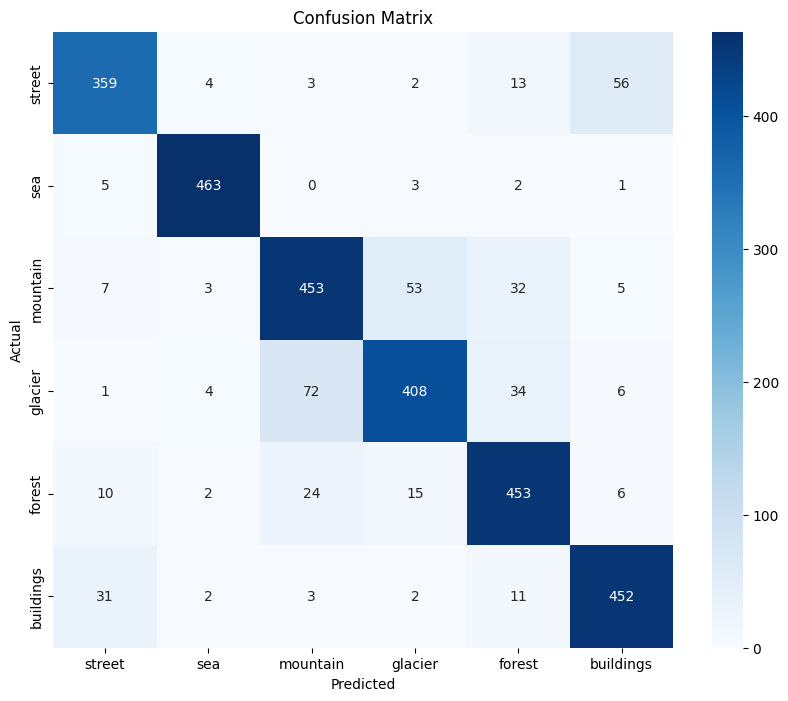

In [19]:
print(params)
early_stopping = CustomEarlyStopping(threshold=0.86)

model = Sequential([
        data_augmentation,
        Rescaling(1./255),
        Conv2D(params['num_filters'], params['kernel_size'], activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(params['num_filters'], params['kernel_size'], activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(params['num_filters'], params['kernel_size'], activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(params['num_filters'], params['kernel_size'], activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        layers.GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(params['dropout']),
        Dense(128, activation='relu'),
        Dropout(params['dropout2']),
        Dense(64, activation='relu'),
        Dropout(params['dropout3']),
        Dense(32, activation='relu'),
        Dropout(params['dropout4']),
        Dense(16, activation='relu'),
        Dense(6, activation = 'softmax')
    ])
optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

print("Training the model")
history = model.fit(
    train_ds,
    epochs = 200,
    validation_data= val_ds,
    verbose = 2,
    callbacks=[early_stopping]
)
print("Evaluating the model")
test_loss, test_accuracy = model.evaluate(val_ds)
print("Test accuracy: ", test_accuracy)
y_true = []
y_pred = []
for x, y in val_ds:
    y_true.extend(y.numpy())
    y_pred.extend(np.argmax(model.predict(x), axis=1))

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}")
conf_matrix = confusion_matrix(y_true, y_pred)

labels = ['street', 'sea', 'mountain', 'glacier', 'forest', 'buildings']

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()